In [2]:
import numpy as np
import pandas as pd

In [3]:
from scipy.stats import chi2_contingency
obs = np.array([[10, 10, 20], [20, 20, 20]])
chi2_contingency(obs)

(2.7777777777777777,
 0.24935220877729622,
 2,
 array([[12., 12., 16.],
        [18., 18., 24.]]))

In [4]:
df = pd.read_csv('data/student-mat.csv')

In [5]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [6]:
table = pd.crosstab(df['sex'],df['school'])
table

school,GP,MS
sex,,
F,183,25
M,166,21


In [7]:
chi2_contingency(table.values)

(0.007584677753178483,
 0.9305999299762074,
 1,
 array([[183.77721519,  24.22278481],
        [165.22278481,  21.77721519]]))

In [9]:
df = pd.read_csv('data/PlantGrowth.csv', index_col= 0)

In [10]:
df

,weight,group
1,4.17,ctrl
2,5.58,ctrl
3,5.18,ctrl
4,6.11,ctrl
5,4.50,ctrl
6,4.61,ctrl
7,5.17,ctrl
8,4.53,ctrl
9,5.33,ctrl
10,5.14,ctrl



# ANOVA (Analsis de varianza)

**ANOVA** = Análisis de la varianza, es una técnica que permite comparar tres o más medias de distintas muestras independientes.


Las hipótesis son:

$H0 : \mu_1=\mu_2=\mu_3=\ldots=\mu_n$

$H1 :$ Al menos una es diferente

Los p_values se sacan con el F-test (F de Snedecor), comparando varianzas. Lo que se busca es una diferencia significativa en al menos uno de los grupos.

Es el ratio entre la varianza de los grupos y el promedio de la varianza de dentro de los grupos

# Supuestos

+ La variable dependiente debe ser **continua**
+ la variable dependiente se distribuye **normalmente** en cada grupo
+ Homogeneidad de varianza
+ las observaciones son independientes
+ **NO DEBEMOS TENER OUTLIERS**

In [11]:
grupos =df['group'].unique() 
grupos

array(['ctrl', 'trt1', 'trt2'], dtype=object)

In [12]:
data = {g:df['weight'][df['group']== g]for g in grupos}
data

{'ctrl': 1     4.17
 2     5.58
 3     5.18
 4     6.11
 5     4.50
 6     4.61
 7     5.17
 8     4.53
 9     5.33
 10    5.14
 Name: weight, dtype: float64,
 'trt1': 11    4.81
 12    4.17
 13    4.41
 14    3.59
 15    5.87
 16    3.83
 17    6.03
 18    4.89
 19    4.32
 20    4.69
 Name: weight, dtype: float64,
 'trt2': 21    6.31
 22    5.12
 23    5.54
 24    5.50
 25    5.37
 26    5.29
 27    4.92
 28    6.15
 29    5.80
 30    5.26
 Name: weight, dtype: float64}

In [13]:
from scipy.stats import f_oneway, norm, f

In [14]:
f_score, p_value = f_oneway(data['ctrl'], data['trt1'], data['trt2']) 
#almenos un grupo es diferente en su media
print(f_score, p_value)

4.846087862380136 0.0159099583256229


In [15]:
f_score, p_value = f_oneway(data['trt2'], data['ctrl']) 
#el trt2 es diferente en su media con el grupo de control por lo tanto funciona el tratamiento
print (f_score, p_value)

4.554043294351827 0.04685138491157386


In [16]:
f_score, p_value = f_oneway(data['trt1'], data['ctrl'])
#el trt2 es igual en su media con el grupo de control por lo tanto NO funciona el tratamiento

print (f_score, p_value) #si el p_value es mayor al alpha las medias son iguales

1.419101297362316 0.24902316597300575


In [17]:
rate=pd.read_csv('data/rate_by_city.csv')

rate.head()

,Rate,City
0,13.75,1
1,13.75,1
2,13.50,1
3,13.50,1
4,13.00,1


In [18]:
rate['City'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [19]:
rate['city_count']=rate.groupby('City').cumcount()

rate.head()

,Rate,City,city_count
0,13.75,1,0
1,13.75,1,1
2,13.50,1,2
3,13.50,1,3
4,13.00,1,4


In [20]:
rate.groupby('City').count()

,Rate,city_count
City,,
1,9,9
2,9,9
3,9,9
4,9,9
5,9,9
6,9,9


In [21]:
rate_pivot = rate.pivot(columns = 'City', values = 'Rate', index = 'city_count')

In [22]:
rate_pivot

City,1,2,3,4,5,6
city_count,,,,,,
0,13.75,14.25,14.00,15.00,14.50,13.50
1,13.75,13.00,14.00,14.00,14.00,12.25
2,13.50,12.75,13.51,13.75,14.00,12.25
3,13.50,12.50,13.50,13.59,13.90,12.00
4,13.00,12.50,13.50,13.25,13.75,12.00
5,13.00,12.40,13.25,12.97,13.25,12.00
6,13.00,12.30,13.00,12.50,13.00,12.00
7,12.75,11.90,12.50,12.25,12.50,11.90
8,12.50,11.90,12.50,11.89,12.45,11.90


In [23]:
f, p = f_oneway(*[rate_pivot[i] for i in range(1, 7)])

In [24]:
f

4.8293848737024

In [25]:
p #pvalue por debajo de los alpha almenos un grupo es diferente

0.001174551414504048

# Para p-value se busca:

+ 99% - confianza se busca que p-value sea menor de 0.01 (alpha) para rechazar hipotesis nula

+ 95% - confianza se busca que p-value sea menor de 0.05 (alpha)para rechazar hipotesis nula

+ 90% - confianza se busca que p-value sea menor de 0.10 (alpha)para rechazar hipotesis nula

In [26]:
p = []
for i in range(len(rate_pivot.columns)-1):
    p.append(f_oneway(rate_pivot.iloc[:,i],rate_pivot.iloc[:,i+1]).pvalue)
p

[0.05336032220284218,
 0.03434494091740313,
 0.8692149917799985,
 0.5603256524164064,
 0.0004624250306693342]

In [ ]:
#1 != 2  en sus medias
#2 != 3 en sus medias 
#3 == 4 en sus medias
#4 == 5 en su medias
#5 != 6 en sus medias

# Ejemplo Campo


**ANOVA Two-Way** : Dos variables independientes categoricas y una dependiente continua.


Supongamos que se tienen datos de produccion de un campo, y ademas los datos del tipo de fertilizante y cantidad de agua usada.


Las hipótesis son:

$H0 : \mu_1=\mu_2=\ldots=\mu_n$  (no hay diferencia significativa entre campos)

$H1 :$ Al menos una es diferente  (existe diferencia significativa en al menos un campo)

In [27]:
df=pd.read_csv('data/crop_yield.csv')
df.head()

,Fert,Water,Yield
0,A,High,27.4
1,A,High,33.6
2,A,High,29.8
3,A,High,35.2
4,A,High,33.0


In [28]:
df['Fert'].unique()

array(['A', 'B'], dtype=object)

In [29]:
df['Water'].unique()

array(['High', 'Low'], dtype=object)

In [30]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [31]:
modelo = ols('Yield ~ C(Fert)+C(Water)', df).fit()
modelo

In [32]:
modelo.f_pvalue

0.015008885925143397

In [33]:
res=sm.stats.anova_lm(modelo, typ=2)
res

,sum_sq,df,F,PR(>F)
C(Fert),69.192,1.0,5.669070,0.029228
C(Water),63.368,1.0,5.191895,0.035887
Residual,207.488,17.0,NaN,NaN


# Regresion Lineal

**Ecuacion de la recta**

$$y = m·x+b$$

In [35]:
import matplotlib.pyplot as plt

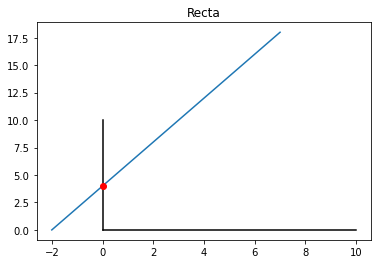

In [36]:
x=[i for i in range(-2, 8)]

m=2
b=4

y=[m*x+b for x in x]

plt.plot(x, y)
plt.plot([0,0], [0,10], color='black')
plt.plot([0,10], [0,0], color='black')
plt.plot(0, b, 'ro')
plt.title('Recta');

In [ ]:
from scipy.stats import linregress

In [37]:
auto=pd.read_csv('data/auto-mpg.csv')
auto.head()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


In [43]:
test = auto.loc[300:,['acceleration','cylinders','horse_power','weight']]

In [ ]:
test

In [47]:
modelo = ols('acceleration ~ cylinders+horse_power+weight', test).fit()

In [49]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           acceleration   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     45.76
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           4.71e-18
Time:                        11:28:37   Log-Likelihood:                -179.73
No. Observations:                  94   AIC:                             367.5
Df Residuals:                      90   BIC:                             377.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      17.2390      1.050     16.422      0.000      15.154      19.324
cylinders       0.1259      0.260      0.483      0.630      -0.392       0.643
horse_power    -0.1603      0.014    -11.396      0.000      -0.188      -0.132
weight          0.0047      0.001      7.806      0.000       0.004       0.006
==============================================================================
Omnibus:                        2.153   Durbin-Watson:                   2.233
Prob(Omnibus):                  0.341   Jarque-Bera (JB):                1.558
Skew:                           0.192   Prob(JB):                        0.459
Kurtosis:                       3.500   Cond. No.                     1.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
df = pd.read_csv('data/housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [51]:
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

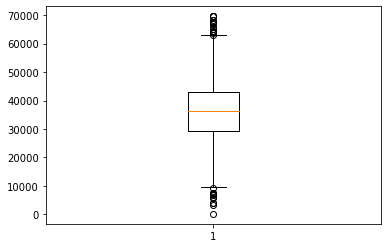

In [53]:
plt.boxplot(df['Area Population']);

In [54]:
quant_20 = df['Area Population'].quantile(0.20)
quant_80 = df['Area Population'].quantile(0.80)

In [55]:
df_2 = df[(df['Area Population'] >= quant_20) & (df['Area Population'] <= quant_80)]

{'whiskers': [<matplotlib.lines.Line2D at 0x2d39a3c2888>,
 'caps': [<matplotlib.lines.Line2D at 0x2d39a69e788>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d39a720b88>],
 'medians': [<matplotlib.lines.Line2D at 0x2d39a79e948>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d39a79e248>],
 'means': []}

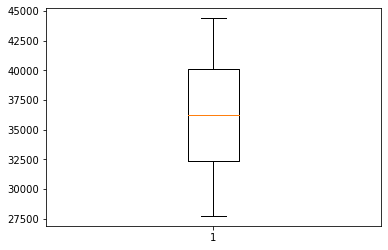

In [56]:
plt.boxplot(df_2['Area Population'])

In [57]:
quant_20_i = df_2['Avg. Area Income'].quantile(0.20)
quant_80_i = df_2['Avg. Area Income'].quantile(0.80)

In [58]:
df_2 = df_2[(df_2['Avg. Area Income'] >= quant_20_i) & (df_2['Avg. Area Income'] <= quant_80_i)]

In [59]:
df_2

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
13,73163.663441,6.919535,5.993188,2.27,32326.123139,1.291332e+06,"829 Welch Track Apt. 992\nNorth John, AR 26532..."
14,69391.380184,5.344776,8.406418,4.37,35521.294033,1.402818e+06,"PSC 5330, Box 4420\nAPO AP 08302"
...,...,...,...,...,...,...,...
4985,75117.042949,6.036275,6.538111,2.22,43976.031060,1.378938e+06,"PSC 7442, Box 6234\nAPO AP 13017"
4986,71060.406015,5.718839,7.222730,4.34,34814.585591,1.260241e+06,"5611 Matthew Avenue\nLake Kevin, FM 72963-8891"
4988,67637.840665,7.056673,5.774409,3.05,43846.531340,1.275143e+06,"6066 Sanders Court Apt. 914\nSouth Alexis, FM ..."
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."


In [62]:
df_2.reset_index(drop = True, inplace = True)
df_2

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
1,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
2,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,USS Gilbert\nFPO AA 20957
3,73163.663441,6.919535,5.993188,2.27,32326.123139,1.291332e+06,"829 Welch Track Apt. 992\nNorth John, AR 26532..."
4,69391.380184,5.344776,8.406418,4.37,35521.294033,1.402818e+06,"PSC 5330, Box 4420\nAPO AP 08302"
...,...,...,...,...,...,...,...
1795,75117.042949,6.036275,6.538111,2.22,43976.031060,1.378938e+06,"PSC 7442, Box 6234\nAPO AP 13017"
1796,71060.406015,5.718839,7.222730,4.34,34814.585591,1.260241e+06,"5611 Matthew Avenue\nLake Kevin, FM 72963-8891"
1797,67637.840665,7.056673,5.774409,3.05,43846.531340,1.275143e+06,"6066 Sanders Court Apt. 914\nSouth Alexis, FM ..."
1798,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."


In [63]:
cols_x = df_2.columns
cols_x

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [64]:
import statsmodels.api as sm
x_train = df_2.loc[:1500,list(cols_x[:-2])]
x_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,61287.067179,5.865890,8.512727,5.13,36882.159400
1,63345.240046,7.188236,5.586729,3.26,34310.242831
2,59927.660813,5.362126,6.393121,2.30,29387.396003
3,73163.663441,6.919535,5.993188,2.27,32326.123139
4,69391.380184,5.344776,8.406418,4.37,35521.294033
...,...,...,...,...,...
1496,75245.465436,8.167820,7.420100,3.42,37410.669928
1497,62317.087353,4.333489,5.575276,4.18,36075.805794
1498,77481.708347,5.688243,6.463808,2.24,30735.595541
1499,75408.358621,5.035659,7.700190,4.02,33003.259847


In [65]:
y_train = df_2.loc[:1500,cols_x[-2]]
y_train

0       1.058988e+06
1       1.260617e+06
2       7.988695e+05
3       1.291332e+06
4       1.402818e+06
            ...     
1496    1.562887e+06
1497    6.853554e+05
1498    1.153680e+06
1499    1.235226e+06
1500    1.423126e+06
Name: Price, Length: 1501, dtype: float64

In [66]:
x_test = df_2.loc[1500:,list(cols_x[:-2])]
x_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1500,73739.847545,4.689009,8.244523,4.16,38988.127975
1501,69327.702459,7.533656,6.904156,4.34,31948.936594
1502,73294.461465,5.703093,5.734421,4.00,32253.018018
1503,60946.591116,7.210325,6.929553,2.17,39660.671298
1504,65480.306601,5.581043,6.690729,2.24,35056.751017
...,...,...,...,...,...
1795,75117.042949,6.036275,6.538111,2.22,43976.031060
1796,71060.406015,5.718839,7.222730,4.34,34814.585591
1797,67637.840665,7.056673,5.774409,3.05,43846.531340
1798,63390.686886,7.250591,4.805081,2.13,33266.145490


In [67]:
y_test = df_2.loc[1500:,cols_x[-2]]
y_test

1500    1.423126e+06
1501    1.550181e+06
1502    1.151129e+06
1503    1.420070e+06
1504    8.608044e+05
            ...     
1795    1.378938e+06
1796    1.260241e+06
1797    1.275143e+06
1798    1.030730e+06
1799    1.198657e+06
Name: Price, Length: 300, dtype: float64

In [68]:
modelo = sm.OLS(y_train,x_train).fit()

In [69]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                          1.495e+04
Date:                Wed, 10 Feb 2021   Prob (F-statistic):                        0.00
Time:                        12:03:42   Log-Likelihood:                         -20259.
No. Observations:                1501   AIC:                                  4.053e+04
Df Residuals:                    1496   BIC:                                  4.055e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Avg. Area Income                -0.0282      0.604     -0.047      0.963      -1.213       1.157
Avg. Area House Age           1.155e+05   4358.795     26.502      0.000    1.07e+05    1.24e+05
Avg. Area Number of Rooms     6.649e+04   5051.828     13.161      0.000    5.66e+04    7.64e+04
Avg. Area Number of Bedrooms  5986.4979   4187.270      1.430      0.153   -2227.045    1.42e+04
Area Population                  1.7114      0.902      1.898      0.058      -0.057       3.480
==============================================================================
Omnibus:                        2.417   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.299   Jarque-Bera (JB):                2.320
Skew:                          -0.049   Prob(JB):                        0.314
Kurtosis:                       2.834   Cond. No.                     9.86e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 9.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

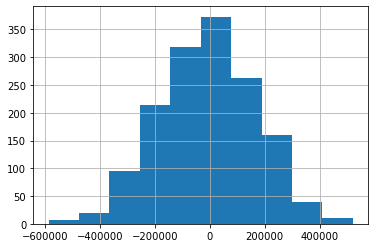

In [72]:
modelo.resid.hist()